# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

----
## Exploring the Data

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = np.sum(data.income == '>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = np.sum(data.income == '<=50K')

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100, 1)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.8%


----
## Preparing the Data

### Transforming Skewed Continuous Features

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

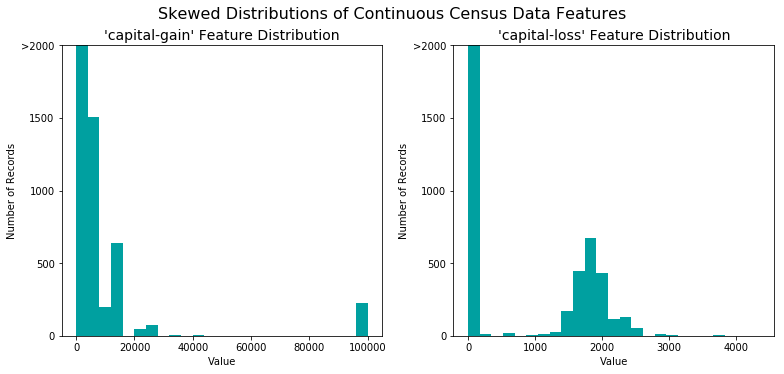

In [5]:
# Visualize skewed continuous features of original data
vs.distribution(features_raw)

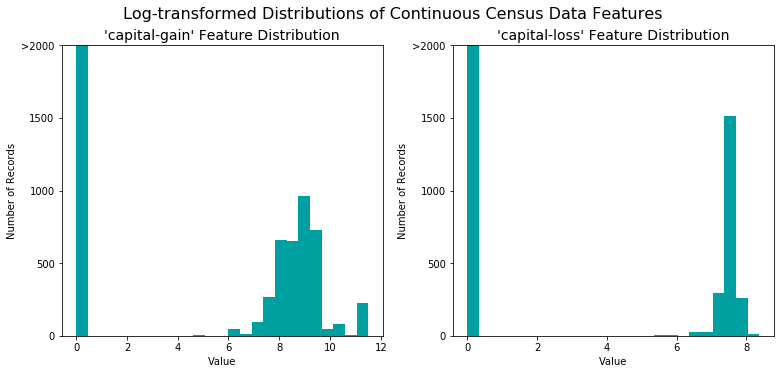

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = features_raw.copy()
features_log_transformed[skewed] = features_log_transformed[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [8]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = [0 if x == '<=50K' else 1 for x in income_raw]

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance

### Question 1 - Naive Predictor Performace

In [10]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
# accuracy == number correctly predicted out of total records; if we predict `>50K`, those are the ones we will get right
accuracy = n_greater_50k / n_records
recall = n_greater_50k/(n_greater_50k + 0)  # if we predict all `>50K`, we will recall 100%; 0 false negatives because we won't predict any negatives
precision = n_greater_50k/(n_greater_50k + n_at_most_50k)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore =  (1 + (beta**2)) * (precision * recall) / (((beta**2) * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Question 2 - Model Application

**NOTE**: I'm not sure I like the `describe one real-world application` question. It assumes that each algorithm has a specific example where it would necessarily do better than others. The typical example of Naive Bayes might be a spam classifier, but that doesn't mean other algorithms won't out perform it in that use case. A model can be applied to many use-cases and each use-case can have different many different models that will potentially out-perform the typical "example" model used. The strengths/weaknesses questions make more sense, that is how you would approach any scenario.

**Answer: **

#### Logistic Regression

- **Example Application**: Predicting credit risk. It could be that banks have to justify who they approve/deny loans for, and logistic regression is extremely transparent. Logistic also gives a probability statement of the outcome. Therefore, a lower threshold could be set (e.g. if the outcome variable was predicting whether or not a customer would `default`) in order to reduce risk.

- **Strengths**: Fast, gives coefficients (and p-values, etc. similar to Linear Regression) that make the model interpretable, gives probability statement as output. The using the "Z statistic ... the preidctors can be ranked to understand which terms had the largest effect on the model. The logisitc regression model is very popular due to its simplicity and ability to make inferential statements about the model terms." (`Applied Predictive Modeling pg 286`)  

- **Weaknesses**: "This model requires the user to identify effective representations of the predictor data that yeild the best performance." `APL pg 187`. By default, the model captures linear relationships (although changing the underlying data via transformations can mitigate that), and also produces a linear classification boundary.

- **Good Candidate**: I'm not necessarily sure it is a great candidate, I expect it to do worse than Random Forest and Adaboost, but I'm interesting to see how it comes to the ensembles/trees. If the ensembles don't significantly outperform the logistic regression, I might consider diving into SVMs (which seem slower to train with large amounts of data and features). Also, Logistic Regression has higher bias lower variance than inherently found in tree methods so, again, it will be interesting to compare.

#### Random Forest

- **Example Application**: My company uses Random Forest to score sales leads from website signups. Random Forest also gives the ability to see relative feature importance, which we use to understand factors that lead people to become customers.
- **Strengths**: Introduces extra randomness (compared to a regular bagging classifier) by looking at a rando subset of features, which tradesa higher bias for a lower variance. (Hands on Machine Learning, pg. 191) It's also easy to measure the relative importance of each feature ... "by looking at how much the tree nodes that use that feature reduce impurity on average." (Hands on Machine Learning, pg. 192) Random Forest also comes with the ability to get the 'out-of-bag' (OOB) measure on performance, eliminating the need to use cross-validation in some cases. "The resulting OOB error is a valid estimate of the test error for the bagged model, since the repsonse for each observation is predicted using only the trees that were not fit using that observation." (Introduction to Statistical Learning pg. 318)
- **Weaknesses**: Unlike Logistic Regression for example, it's difficult to know/report exactly how the model is making decisions.
- **Good Candidate**: There are categorical features in the dataset that have many values (e.g. `education`, `marital-status`, `occupation`, `country`) and the potential to seperate the outcome (`income`) by value or combination of values that could lend themself well to "rules" or "trees".

#### Adaboost

- **Example Application**: Adaboost can be used for small to medium size datasets, on a variety of problems. I'm not sure that given a single example specific to Adaboost really makes sense.
- **Strengths**: "Unlike fiting a single large decision tree to the data, which amounts to fittin gthe data hard and potentially overfitting, the boosting approach instead 'learns slowly'. In general, statistical learning approachs that 'learn slowly' tend to perform well. (Introduction to Statistical Learning pg. 321-322)
- **Weaknesses**: Adaboost cannot be parallelized since each predictor can only be trained after the previous predictor has be trained and evaluatoed. As a result it does not scale as well as bagging." (Hands On Machine Learning pg. 195).
- **Good Candidate**: Same as above, except that it would be good to try out boosting ensembe rather than bagging to see if one lends itself better to the data.

### Implementation - Creating a Training and Predicting Pipeline

In [11]:
# TODO: Import two metrics from sklearn - fbeta_score and 
from sklearn.metrics import fbeta_score, accuracy_score

In [12]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_true=y_train[:300], y_pred=predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_true=y_test, y_pred=predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_true=y_train[:300], y_pred=predictions_train, beta=beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_true=y_test, y_pred=predictions_test, beta=beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

In [13]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = AdaBoostClassifier(random_state=42)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = round(len(y_train) * 0.10)
samples_1 = round(len(y_train) * 0.01)

LogisticRegression trained on 362 samples.
LogisticRegression trained on 3618 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.
AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.


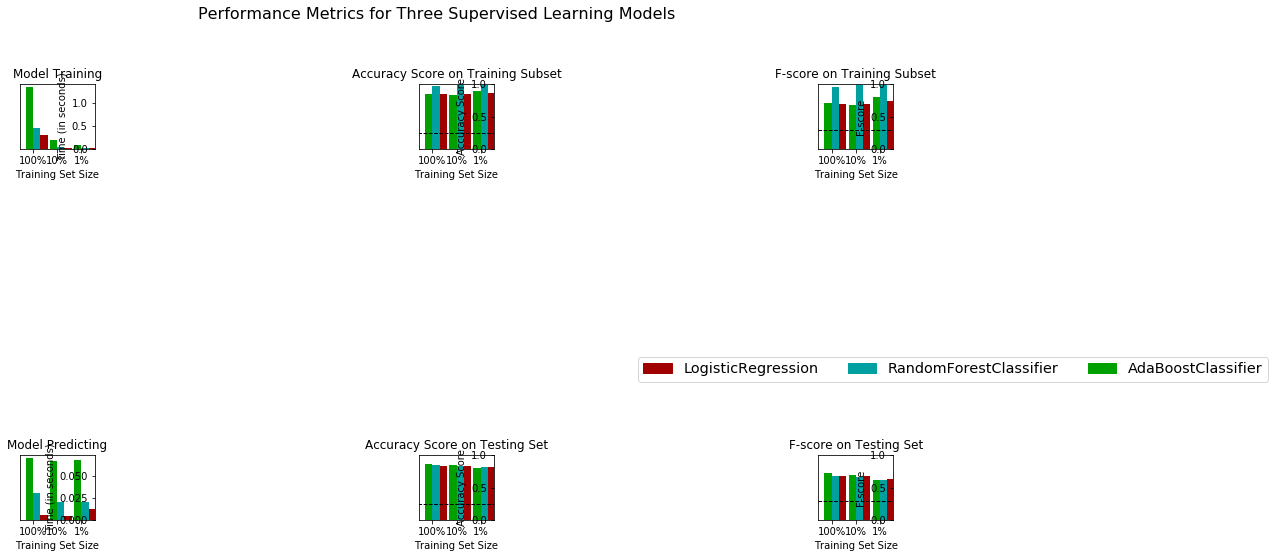

In [14]:
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [15]:
results

{'LogisticRegression': {0: {'train_time': 0.011049985885620117,
   'pred_time': 0.012072086334228516,
   'acc_train': 0.86,
   'acc_test': 0.820563847429519,
   'f_train': 0.7386363636363635,
   'f_test': 0.6336913510457886},
  1: {'train_time': 0.019863128662109375,
   'pred_time': 0.004400968551635742,
   'acc_train': 0.8466666666666667,
   'acc_test': 0.8388059701492537,
   'f_train': 0.703125,
   'f_test': 0.6780948247802974},
  2: {'train_time': 0.29187679290771484,
   'pred_time': 0.005844831466674805,
   'acc_train': 0.8466666666666667,
   'acc_test': 0.841901603095633,
   'f_train': 0.6985294117647058,
   'f_test': 0.6831652282416554}},
 'RandomForestClassifier': {0: {'train_time': 0.021956920623779297,
   'pred_time': 0.02032327651977539,
   'acc_train': 0.9833333333333333,
   'acc_test': 0.8133775566611388,
   'f_train': 0.9852941176470588,
   'f_test': 0.6157261995017871},
  1: {'train_time': 0.04905390739440918,
   'pred_time': 0.02026224136352539,
   'acc_train': 0.9966666

In [16]:
["{}: f-beta score on test set (all) {}".format(key, value[2]['f_test']) for key, value in results.items()]

['LogisticRegression: f-beta score on test set (all) 0.6831652282416554',
 'RandomForestClassifier: f-beta score on test set (all) 0.6841786830694767',
 'AdaBoostClassifier: f-beta score on test set (all) 0.7245508982035928']

In [17]:
["{}: accuracy score on test set (all) {}".format(key, value[2]['acc_test']) for key, value in results.items()]

['LogisticRegression: accuracy score on test set (all) 0.841901603095633',
 'RandomForestClassifier: accuracy score on test set (all) 0.8431177446102819',
 'AdaBoostClassifier: accuracy score on test set (all) 0.8576008844665561']

----
## Improving Results

### Question 3 - Choosing the Best Model

**Answer: **

`Adaboost` seemed to perform the best. It slightly outperformed the other two models in turms of `accuracy`, but showed a significance increase in the `f-beta` score, which is likely a better measurement given the goals of the project (i.e. why f-beta was chosen in the first-place). The prediction time wasn't a factor in any of the models, so I would not consider that when making the final choice. Adaboost can be used on a very wide set of classification problems and typically has competitive performance.

### Question 4 - Describing the Model in Layman's Terms

In [36]:
from scipy.stats import randint
g = randint(1, 4)
g.rvs(20)

array([2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2])

**Answer: ** 

Adaboost is a specific implementation of a `boosting` algorithm. "Boosting" algorithms combine many "weak" learners to try to reach the performance of "strong" learners. For example, if a decision tree is used as a base learner, the algorithm will construct many decision trees. Each decision tree, by itself, will not have great, or even good performance. However, the agorithm will combine the votes of the many decision trees it built. Rather than giving each tree an qual "vote" in determining the end result, each tree is assigned a weight based on its past peformance. Therefore, the decision trees that perform better have great influence on the final prediction. (Machine Learning with R pg. 366) 

### Implementation: Model Tuning

In [20]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.2, 1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=beta)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8664
Final F-score on the testing data: 0.7432


In [24]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("Final AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246
AUC on testing data: 0.7716

Optimized Model
------
Final accuracy score on the testing data: 0.8664
Final F-score on the testing data: 0.7432
Final AUC on testing data: 0.7716


In [21]:
best_clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=500, random_state=42)

### Question 5 - Final Model Evaluation

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8576       |    0.8664       |
| F-score        |      0.7246       |    0.7432       |


**Answer: **

It appears that the optimized model slightly outperforms the unoptimized model on unseen i.e. test data. For the hyper-parameters tuned (`n_estimators` and `learning_rate`) the `best_estimator_` that was chosen corresponds to the middle values tried (e.g. `200` of `[100, 200, 500]` and `0.2` of `[0.1, 0.2, 1]`. This suggests that I've captured the bound of optimized values and, if I wanted to try to further improve performance, I could try parameter values both above/below the optimized value, but within the other two values I tried, for both parameters. Perhaps, for example, I could try `[150, 200, 250]` for `n_estimators` and `[0.15, 0.2, 0.3]` for `learning_rate`, etc.

----
## Feature Importance

### Question 6 - Feature Relevance Observation

**Answer:** `country`, `age`, `education`/`education-num`, `capital-gain`, `capital-loss`

I would guess `country` is the top. It seems like people who are from similar countries form clusters of income. Poeple who are the same age/education in one country may have very different incomes in another. Age and education (consistenting of two variables but i'll treat them as one, since I'm not sure which will be more effective) also seem like they would be important. My guess is age is  more important than education, because education is dependant on age. If the capital-gain/loss fields weren't missing so many values I would rank these as being the most important; but will all the missing values I'm assuming these fields loose effectiveness.

### Implementation - Extracting Feature Importance

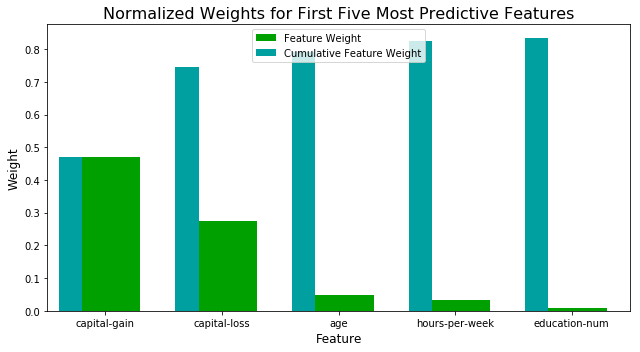

In [97]:
# TODO: Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

**Answer:**

My top guess was `country`, which didn't make it on the list. Perhaps it was because `91%` of the values were `United States`, making the US over-represented and not having enough data frome other countries to find any patterns. Also, I ranked `capital-gain`/`loss` as number `4` and `5` but they are number `1` and `2`. It surprises me that those fields have such high relative importance given that >90% of the valuse were missing in both fields. I also didn't have `hours-per-week` in my list. I left this off my top 5 because I assumed there are many people who work a lot and make little, as well as people who work less and make more. I thought this would create noise. Perhaps the majority of population have hourly wages and would, therefore, have a linear relationship to income.

### Feature Selection

In [98]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8664
F-score on testing data: 0.7432

Final Model trained on reduced data
------
Accuracy on testing data: 0.8426
F-score on testing data: 0.7044


### Question 8 - Effects of Feature Selection

**Answer:**

The accuracy drops `~0.025` and the F-Score drops by `~0.04`. One potential reason reason this could be is that there is a class imbalance, and the additional features play a role in distinguishing true positives in the non-standard cases (e.g. for other countries; non-US data make up about 10% of the dataset). Because of the class imbalance, it's possible that an increase in false-negatives lowers the f-beta score faster than the accuracy score.

If training time was a factor, it might be reasonable to test out many models/hyper-parameters on this reduced data, and when a few final candidates were chosen, re-training and/or cross validate on the entire training set in order to fine-tune and select the best model.